In [56]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [57]:
data = pd.read_csv('water_potability.csv')
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [58]:
data.shape

(3276, 10)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [60]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [61]:
data['ph']=data['ph'].fillna(data.groupby(['Potability'])['ph'].transform('median'))
data['Sulfate']=data['Sulfate'].fillna(data.groupby(['Potability'])['Sulfate'].transform('median'))
data['Trihalomethanes']=data['Trihalomethanes'].fillna(data.groupby(['Potability'])['Trihalomethanes'].transform('median'))
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.035456,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.389426,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.389426,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,331.838167,392.449580,19.903225,66.678214,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,331.838167,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,331.838167,402.883113,11.168946,77.488213,4.708658,1


In [62]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [63]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074069,196.369496,22014.092526,7.122277,333.544928,426.205111,14.284970,66.405792,3.966786,0.390110
std,1.470043,32.879761,8768.570828,1.583085,36.146829,80.824064,3.308162,15.769943,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.035456,196.967627,20927.833607,7.130299,333.389426,421.884968,14.218338,66.542198,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [64]:
Features = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']

In [65]:
data.corr()['Potability'][Features].sort_values(ascending=False)

Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007094
Turbidity          0.001581
ph                -0.002946
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.025339
Organic_carbon    -0.030001
Name: Potability, dtype: float64

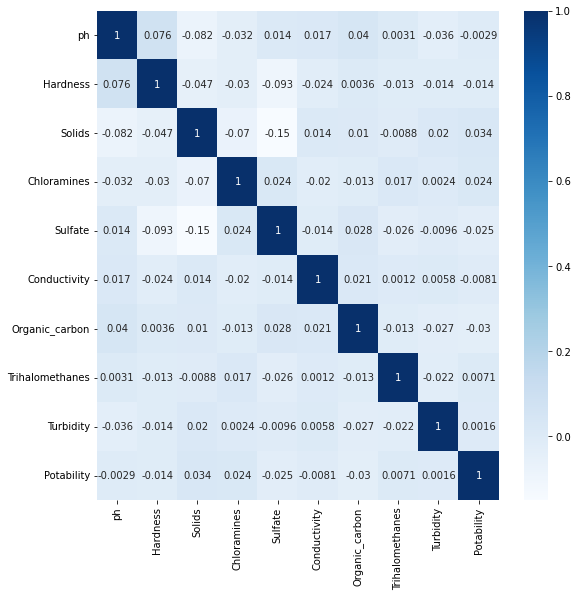

In [66]:
plt.figure(figsize=(9, 9))
sns.heatmap(data.corr(), cbar=True, annot=True, cmap='Blues')

In [67]:
target_column = 'Potability'
X = data[Features]
y = data[[target_column]]

In [68]:
scaler = MinMaxScaler()
columns = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=columns)
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.502533,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091
1,0.265434,0.297400,0.300611,0.491839,0.580601,0.719411,0.497319,0.450999,0.576793
2,0.578509,0.641311,0.321619,0.698543,0.580601,0.414652,0.562017,0.532866,0.303637
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327


In [69]:
# lấy các biến đôc lập
Features = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity'] 
# lấy nhãn của dataset
target_column = 'Potability'
X = data[Features]
y = data[[target_column]]
# chia ngẫu nhiên 80% train 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,train_size = 0.8 , test_size=0.2, random_state=42)

In [70]:
# thuật toán Random Forest
rf = RandomForestClassifier(criterion='gini',max_depth=10,random_state=42)
gs_rf = rf.fit(X_train,y_train)

<ipython-input-70-70321075e280>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  gs_rf = rf.fit(X_train,y_train)


In [71]:
# thuật toán Logistic Regression
lg = LogisticRegression()
gs_lg = lg.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
# thuật toán Naive Bayes
gnb = GaussianNB()
gs_gnb = gnb.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
gnb.fit(X_train,y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [73]:
#logistic regression kết quả dự đoán
y_pred_lg = gs_lg.predict(X_test)
#random forest kết quả dự đoán
y_pred_rf = gs_rf.predict(X_test)
#naive bayes kết quả dự đoán
y_pred_gnb = gs_gnb.predict(X_test)

In [74]:
print("  RANDOM FORREST  ","Score","     Logistic Regression    ","Score","             Naive Bayes    ","Score")
print("     ACCURACY :   ",format(accuracy_score(y_true = y_test, y_pred = y_pred_rf)*100,".3f"),"%","           ACCURACY :    ",format(accuracy_score(y_true = y_test, y_pred = y_pred_lg)*100,".3f"),"%","           ACCURACY :    ",format(accuracy_score(y_true = y_test, y_pred = y_pred_gnb)*100,".3f"),"%")

  RANDOM FORREST   Score      Logistic Regression     Score              Naive Bayes     Score
     ACCURACY :    80.488 %            ACCURACY :     60.976 %            ACCURACY :     60.976 %
